# **<center> Predicción del rendimiento académico estudiantil </br> Clasificacion utilizando Support Vector Machine </center>**
<h6>
    <center> Miguel Angel Macias, Jhon Flores <br/> 
    <i>Universidad de Cuenca <br/>  <i>Facultad de Ingenieria - Escuela de Sistemas<br/> Cuenca, Ecuador</i>
    <br/> { mangel.maciasn, jhon.flores }@ucuenca.edu.ec</center>
<h6>

## **1.&emsp; Import**
>Comenzamos importando todas las herramientas que vamos a utilizar para la manejo de los datos y entrenar el modelo para la clasificacion. Se cargan en memoria 5 tablas .csv sin manipular y 2 tablas .csv previamente tratadas.

In [152]:
import numpy as np              # Para operaciones matematicas
import pandas as pd             # Manejo de datos / dataframes
from sys import getsizeof       # Operaciones de sistema
import matplotlib.pyplot as plt #

from sklearn.preprocessing import MinMaxScaler            #
from sklearn.model_selection import train_test_split      #

from sklearn.svm import SVC
from sklearn import metrics                               # 

from sklearn.model_selection import cross_val_score, GridSearchCV

%matplotlib inline

In [153]:
data_raw = '../data/raw'              # directorio que contiene toda la data sin manipular
data_processed = '../data/processed'  # directorio que contiene data procesada

#### **1.2.&emsp; Dataset df_students**
>Contiene el registro de los datos demográficos y de comportamiento de los estudiante de dos materias de un colegio en Portugal. Los valores categoricos estan convertidos a numericos y contiene una columna "class" que muestra si un estudiante aprueba (1) o reprueba (0) la materia.

In [154]:
df_students = pd.read_csv(data_processed+"/df_students.csv")
df_students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,0


In [155]:
df_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'class'],
      dtype='object')

## **2.&emsp; Modelo Support Vector Clasifier (SVC)**
Ahora se construira un modelo con el dataset previamente mencionado. Para el modelo se tomaron en cuenta columnas que aportan al modelo que fueron obtenidas en el EDA por medio de los Feature selection. El modelo contruido sera para clasificar si un estudiante apreueba (1) o reprueba (0) la materia. A continuacion se muestra cuales son las caracteristicas para el modelo:
>- failures - número de fallas de clases pasadas (numeric: n if 1<=n<3, else 4)
- schoolsup - apoyo educativo adicional (binary: yes or no)
- paid - clases pagas adicionales dentro de la asignatura (Math or Portuguese) (binary: yes or no)
- nursery - asistió a la enfermería (binary: yes or no)
- freetime - tiempo libre después de la escuela (numeric: from 1 - very low to 5 - very high)
- Dalc - consumo de alcohol en la jornada laboral (numeric: from 1 - very low to 5 - very high)
- absences - número de ausencias escolares (numeric: from 0 to 93)
- studytime - tiempo de estudio semanal (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- goout - salir con amigos (numeric: from 1 - very low to 5 - very high)
- G1 - calificación del primer período (numeric: from 0 to 20)

#### **2.1.&emsp; Separacion de conjunto de Estrenamiento y Prueba**
>Separamos las caractertisticas en variables dependientes e independientes. Luego esas variables se dividiran en un conjunto de entrenamiento y prueba.

In [156]:
# failures, schoolsup, paid, nursery, freetime, Dalc, absences, studytime, goout, G1
X = df_students[["failures", "schoolsup", "paid", "nursery",
                 "freetime", "Dalc", "absences", "studytime", "goout", "G1"]]
y = df_students['class']

scaler = MinMaxScaler()
tmp = scaler.fit_transform(X)
X = pd.DataFrame(tmp, columns=X.columns)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#### **2.2.&emsp; Entrenamiento del Modelo**

###### **2.2.1.&emsp; Tuning de Hyperparametros**
>Se realizara un tuneo de los hyperparametros del modelo para obtener un mejor resultado.

In [ ]:
# Perform Grid-Search
clf = SVC()

parameters = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "C": [1e2, 1e3, 1e4, 1e5, 1e6, 1e7],
    "gamma": np.logspace(-2, 2, 5)
}

# clf_svc = RandomizedSearchCV(clf_svc, param_distributions=parameters, scoring="accuracy", cv=5, n_jobs=-1, n_iter=15)
clf = GridSearchCV(clf, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1)
model_svc = clf.fit(X_train, y_train)

#print ("R2 score:", r2(y_test,y_predict))
print("Best score : ", model_svc.best_score_)
print("Best Parameters : ", model_svc.best_params_)
#print("Accuracy Score : ", accuracy_score(model_svc.predict(X_test), y_test))
print("Training Accuracy : ", model_svc.score(X_train, y_train))
print("Test Accuracy : ", model_svc.score(X_test, y_test))


>Ahora, se entrena el modelo en el conjunto de entrenamiento. Luego se realizará predicciones en el conjunto de prueba que se tiene previamente. Luego, se verifica la precisión utilizando valores reales y pronosticados.

In [158]:
svclassifier = SVC(kernel='linear', random_state=42)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print("Prediction Random Forest: {:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

Prediction Random Forest: 0.869


In [159]:
print("Training score: ", svclassifier.score(X_train, y_train))
print("Test score: ", svclassifier.score(X_test, y_test))

Training score:  0.8712328767123287
Test score:  0.8694267515923567


## **3.&emsp; Evaluacion del Clasificador SVC**
Ya realizado la prediccion de que si los estudiantes aprobaron o no la materia, lo que se realizara ahora es comparar los valores de la prediccion con los datos reales.

#### **3.1.&emsp; Creacion Matriz de Confusion**
>En esta matriz 

In [160]:
pd.crosstab(y_test, y_pred, rownames=['Datos Actuales'], colnames=['Datos Predichos'])

Datos Predichos,0,1
Datos Actuales,,
0,86,28
1,13,187


Confusion matrix, without normalization
[[ 86  28]
 [ 13 187]]


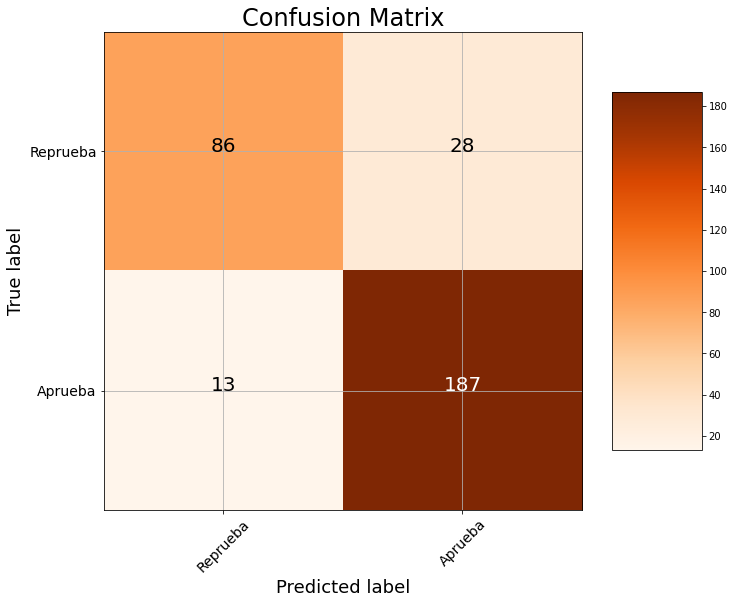

In [161]:
from sklearn.metrics import confusion_matrix
import itertools
#plt.style.use('fivethirtyeight')
#plt.rcParams['font.size'] = 18

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Reprueba', 'Aprueba'],
                      title = 'Confusion Matrix')

### Clasification Report

In [162]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 86  28]
 [ 13 187]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       114
           1       0.87      0.94      0.90       200

    accuracy                           0.87       314
   macro avg       0.87      0.84      0.85       314
weighted avg       0.87      0.87      0.87       314

0.8694267515923567
